In [13]:
#Import Libaries
import json
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas
import geopandas as gpd
import pandas as pd
import re
import contextily as ctx
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

In [2]:
# Load GeoJSON file
with open('../assets/areas-with-high-aedes-population-geojson.geojson', 'r') as f:
    data = json.load(f)
# Convert the GeoJSON data to a GeoDataFrame
aedes_gdf = gpd.GeoDataFrame.from_features(data['features'])

In [3]:
aedes_gdf['Description'][0]

'<center><table><tr><th colspan=\'2\' align=\'center\'><em>Attributes</em></th></tr><tr bgcolor="#E3E3F3"> <th>DESCRIPTION</th> <td>CO52- Asimont Ln / Barker Rd / Dunearn Rd / Goldhill Ave / Goldhill Dr / Goldhill Pl / Goldhill Rise / Goldhill View / Malcolm Pk / Malcolm Rd / Mtrosie Rd / Swiss Cottage Estate / Whitley Rd</td> </tr><tr bgcolor=""> <th>NAME</th> <td>High Aedes Mosquitoes Population Area. Let\'s fight Dengue together. Do the Mozzie Wipe-out today. </td> </tr><tr bgcolor="#E3E3F3"> <th>HYPERLINK</th> <td>https://www.nea.gov.sg/dengue-zika/Aedes</td> </tr><tr bgcolor=""> <th>INC_CRC</th> <td>5DB3C5276DEB0700</td> </tr><tr bgcolor="#E3E3F3"> <th>FMEL_UPD_D</th> <td>20210914224949</td> </tr></table></center>'

In [4]:
# define regular expressions for each attribute
locality_re = r'<th>DESCRIPTION<\/th>\s*<td>(.*?)<\/td>'
des_re = r'<th>NAME<\/th>\s*<td>(.*?)<\/td>'
hyperlink_re = r'<th>HYPERLINK<\/th>\s*<td>(.*?)<\/td>'
inc_crc_re = r'<th>INC_CRC<\/th>\s*<td>(.*?)<\/td>'
fmel_upd_d_re = r'<th>FMEL_UPD_D<\/th>\s*<td>(.*?)<\/td>'

# apply regular expressions to extract attributes
aedes_gdf['locality'] = aedes_gdf['Description'].str.extract(locality_re, flags=re.IGNORECASE)
aedes_gdf['des'] = aedes_gdf['Description'].str.extract(des_re, flags=re.IGNORECASE)
aedes_gdf['link'] = aedes_gdf['Description'].str.extract(hyperlink_re, flags=re.IGNORECASE)
aedes_gdf['inc_crc'] = aedes_gdf['Description'].str.extract(inc_crc_re, flags=re.IGNORECASE)
aedes_gdf['fmel_upd_d'] = aedes_gdf['Description'].str.extract(fmel_upd_d_re, flags=re.IGNORECASE)
# get datetime
aedes_gdf['update_dt']=pd.to_datetime(aedes_gdf['fmel_upd_d'],format='%Y%m%d%H%M%S')

In [5]:
aedes_gdf

,geometry,Name,Description,locality,des,link,inc_crc,fmel_upd_d,update_dt
0,"POLYGON Z ((103.83178 1.32596 0.00000, 103.832...",kml_1,<center><table><tr><th colspan='2' align='cent...,CO52- Asimont Ln / Barker Rd / Dunearn Rd / Go...,High Aedes Mosquitoes Population Area. Let's f...,https://www.nea.gov.sg/dengue-zika/Aedes,5DB3C5276DEB0700,20210914224949,2021-09-14 22:49:49
1,"POLYGON Z ((103.83356 1.30894 0.00000, 103.833...",kml_2,<center><table><tr><th colspan='2' align='cent...,CO53- Balmoral Cres / Balmoral Rd / Bt Timah R...,High Aedes Mosquitoes Population Area. Let's f...,https://www.nea.gov.sg/dengue-zika/Aedes,5D28B12A008DDCD2,20210914224949,2021-09-14 22:49:49
2,"POLYGON Z ((103.83438 1.36239 0.00000, 103.834...",kml_3,<center><table><tr><th colspan='2' align='cent...,CO70- Fulton Ave / Fulton Rd,High Aedes Mosquitoes Population Area. Let's f...,https://www.nea.gov.sg/dengue-zika/Aedes,97F8C965EBCA685D,20210914224949,2021-09-14 22:49:49
3,"POLYGON Z ((103.82744 1.35625 0.00000, 103.827...",kml_4,<center><table><tr><th colspan='2' align='cent...,CO71- Capricorn Dr / Florida Rd / Jupiter Rd /...,High Aedes Mosquitoes Population Area. Let's f...,https://www.nea.gov.sg/dengue-zika/Aedes,68789297E6814D5E,20210914224949,2021-09-14 22:49:49
4,"POLYGON Z ((103.81471 1.32312 0.00000, 103.814...",kml_5,<center><table><tr><th colspan='2' align='cent...,CO72- Bt Timah Rd / Cluny Hill / Cluny Pk / Cl...,High Aedes Mosquitoes Population Area. Let's f...,https://www.nea.gov.sg/dengue-zika/Aedes,165DCEB2D995996D,20210914224949,2021-09-14 22:49:49
...,...,...,...,...,...,...,...,...,...
314,"POLYGON Z ((103.87211 1.36823 0.00000, 103.872...",kml_315,<center><table><tr><th colspan='2' align='cent...,FL481- Serangoon North Ave 1,High Aedes Mosquitoes Population Area. Let's f...,https://www.nea.gov.sg/dengue-zika/Aedes,4F0A18D2F685845C,20210722095516,2021-07-22 09:55:16
315,"MULTIPOLYGON Z (((103.89080 1.36578 0.00000, 1...",kml_316,<center><table><tr><th colspan='2' align='cent...,FL482- Hougang Ave 2 / Hougang Ave 3,High Aedes Mosquitoes Population Area. Let's f...,https://www.nea.gov.sg/dengue-zika/Aedes,801DE4FA6A80980C,20210722095516,2021-07-22 09:55:16
316,"POLYGON Z ((103.85029 1.37247 0.00000, 103.849...",kml_317,<center><table><tr><th colspan='2' align='cent...,FL493- Ang Mo Kio Ave 5 / Ang Mo Kio Ave 8,High Aedes Mosquitoes Population Area. Let's f...,https://www.nea.gov.sg/dengue-zika/Aedes,EE97298B5C4F5703,20210722095516,2021-07-22 09:55:16
317,"POLYGON Z ((103.87299 1.35843 0.00000, 103.873...",kml_318,<center><table><tr><th colspan='2' align='cent...,FL393- Serangoon Ave 4,High Aedes Mosquitoes Population Area. Let's f...,https://www.nea.gov.sg/dengue-zika/Aedes,E4377182F103D0C3,20210722095516,2021-07-22 09:55:16


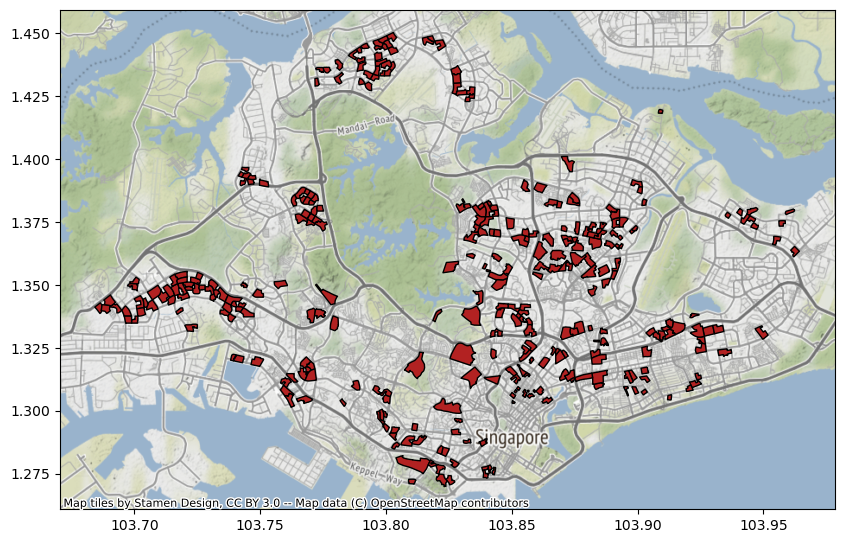

In [6]:
ax = aedes_gdf.plot(figsize=(10,10), alpha=1, edgecolor='k', color='firebrick')
# Add a basemap
ctx.add_basemap(ax, crs='urn:ogc:def:crs:OGC:1.3:CRS84')
# Show the plot
plt.show()

In [7]:
# Load GeoJSON file
with open('../Assets/dengue-clusters-geojson.geojson', 'r') as f:
    data = json.load(f)
# Convert the GeoJSON data to a GeoDataFrame
clusters_gdf = gpd.GeoDataFrame.from_features(data['features'])

In [8]:
clusters_gdf['Description'][0]

'<center><table><tr><th colspan=\'2\' align=\'center\'><em>Attributes</em></th></tr><tr bgcolor="#E3E3F3"> <th>LOCALITY</th> <td>Hougang Ave 3 (Blk 24)</td> </tr><tr bgcolor=""> <th>CASE_SIZE</th> <td>2</td> </tr><tr bgcolor="#E3E3F3"> <th>NAME</th> <td>Dengue_Cluster</td> </tr><tr bgcolor=""> <th>HYPERLINK</th> <td>https://www.nea.gov.sg/dengue-zika/dengue/dengue-clusters</td> </tr><tr bgcolor="#E3E3F3"> <th>HOMES</th> <td></td> </tr><tr bgcolor=""> <th>PUBLIC_PLACES</th> <td></td> </tr><tr bgcolor="#E3E3F3"> <th>CONSTRUCTION_SITES</th> <td></td> </tr><tr bgcolor=""> <th>INC_CRC</th> <td>13379104E0CB0133</td> </tr><tr bgcolor="#E3E3F3"> <th>FMEL_UPD_D</th> <td>20210930143245</td> </tr></table></center>'

In [9]:
# define regular expressions for each attribute
locality_re = r'<th>LOCALITY<\/th>\s*<td>(.*?)<\/td>'
case_size_re = r'<th>CASE_SIZE<\/th>\s*<td>(.*?)<\/td>'
name_re = r'<th>NAME<\/th>\s*<td>(.*?)<\/td>'
hyperlink_re = r'<th>HYPERLINK<\/th>\s*<td>(.*?)<\/td>'
homes_re = r'<th>HOMES<\/th>\s*<td>(.*?)<\/td>'
public_places_re = r'<th>PUBLIC_PLACES<\/th>\s*<td>(.*?)<\/td>'
construction_sites_re = r'<th>CONSTRUCTION_SITES<\/th>\s*<td>(.*?)<\/td>'
inc_crc_re = r'<th>INC_CRC<\/th>\s*<td>(.*?)<\/td>'
fmel_upd_d_re = r'<th>FMEL_UPD_D<\/th>\s*<td>(.*?)<\/td>'

# apply regular expressions to extract attributes
clusters_gdf['locality'] = clusters_gdf['Description'].str.extract(locality_re, flags=re.IGNORECASE)
clusters_gdf['case_size'] = clusters_gdf['Description'].str.extract(case_size_re, flags=re.IGNORECASE).astype(int)
clusters_gdf['name_des'] = clusters_gdf['Description'].str.extract(name_re, flags=re.IGNORECASE)
clusters_gdf['link'] = clusters_gdf['Description'].str.extract(hyperlink_re, flags=re.IGNORECASE)
clusters_gdf['homes'] = clusters_gdf['Description'].str.extract(homes_re, flags=re.IGNORECASE)
clusters_gdf['public_places'] = clusters_gdf['Description'].str.extract(public_places_re, flags=re.IGNORECASE)
clusters_gdf['construction_sites'] = clusters_gdf['Description'].str.extract(construction_sites_re , flags=re.IGNORECASE)
clusters_gdf['inc_crc'] = clusters_gdf['Description'].str.extract(inc_crc_re, flags=re.IGNORECASE)
clusters_gdf['fmel_upd_d'] = clusters_gdf['Description'].str.extract(fmel_upd_d_re, flags=re.IGNORECASE)
# get datetime
clusters_gdf['update_dt']=pd.to_datetime(clusters_gdf['fmel_upd_d'],format='%Y%m%d%H%M%S')

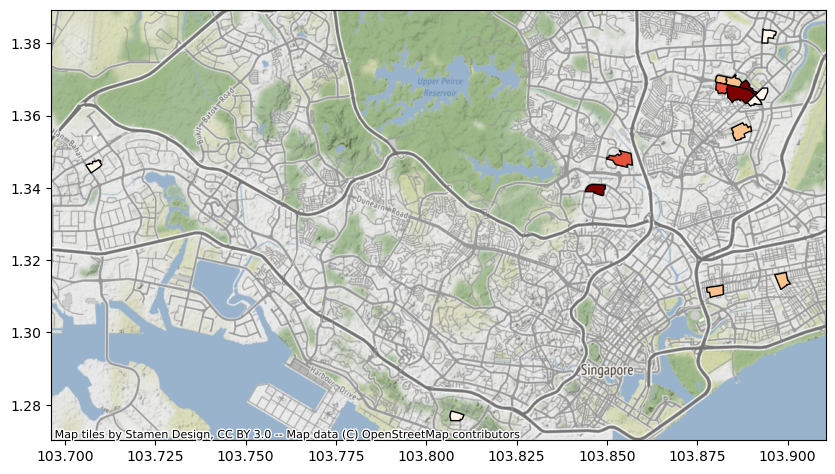

In [10]:
ax = clusters_gdf.plot(figsize=(10,10), alpha=1, edgecolor='k',
                      column='case_size', cmap='OrRd', scheme='quantiles')
# Add a basemap
ctx.add_basemap(ax, crs='urn:ogc:def:crs:OGC:1.3:CRS84')
# Show the plot
plt.show()

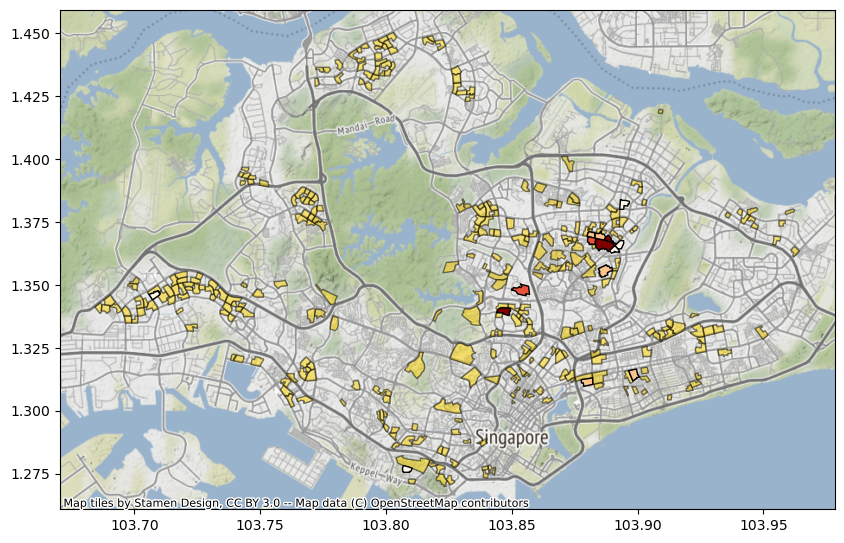

In [11]:
# Create the plot and set the x-axis
ax = aedes_gdf.plot(figsize=(10,10), alpha=0.5, edgecolor='k', color='gold')
# Add a basemap
ctx.add_basemap(ax, crs='urn:ogc:def:crs:OGC:1.3:CRS84')
# Overlay the other graphs using the same ax object
clusters_gdf.plot(column='case_size', alpha=1, edgecolor='k',
                  cmap='OrRd', scheme='quantiles', ax=ax)
# Show the plot
plt.show()

In [12]:
aedes_gdf['update_dt'].describe()

count                     319
unique                      3
top       2021-07-22 09:55:16
freq                      207
first     2021-07-22 09:55:16
last      2021-09-14 22:49:49
Name: update_dt, dtype: object

In [14]:
clusters_gdf['update_dt'].describe()

count                      15
unique                      5
top       2021-10-07 16:01:45
freq                        6
first     2021-09-30 14:32:45
last      2021-10-07 16:01:45
Name: update_dt, dtype: object